# Credit Card Fraud Detection



# Problem statement:-
The aim of the project is to predict fraudulent credit card transactions using machine learning models. This is crucial from the bank’s as well as customer’s perspective. The banks cannot afford to lose their customers’ money to fraudsters. Every fraud is a loss to the bank as the bank is responsible for the fraud transactions.

The dataset contains transactions made over a period of two days in September 2013 by European credit cardholders. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. We need to take care of the data imbalance while building the model and come up with the best model by trying various algorithms.

# Steps:- -->
The steps are broadly divided into below steps. The sub steps are also listed while we approach each of the steps.

Reading, understanding and visualising the data

Preparing the data for modelling

Building the model

Evaluate the model

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [28]:
# Read the CSV file into a DataFrame
df = pd.read_csv(r"D:\new projects\creditcard.csv")
# Display the DataFrame
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


EDA


In [29]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [30]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [31]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [32]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Visulactions

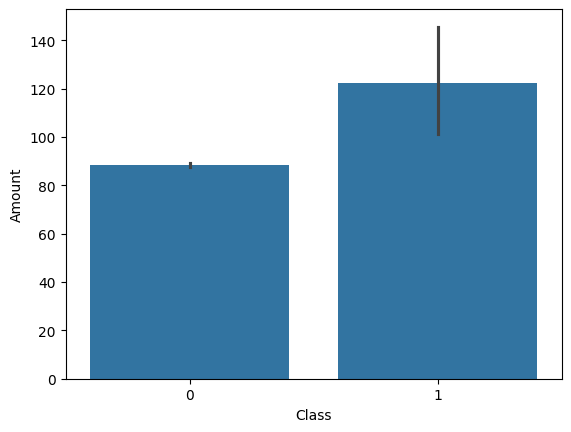

In [33]:
# Create the bar plot
sns.barplot(x="Class", y="Amount", data=df, estimator='mean')
# Show the plot
plt.show()

d:\new projects\guvi\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


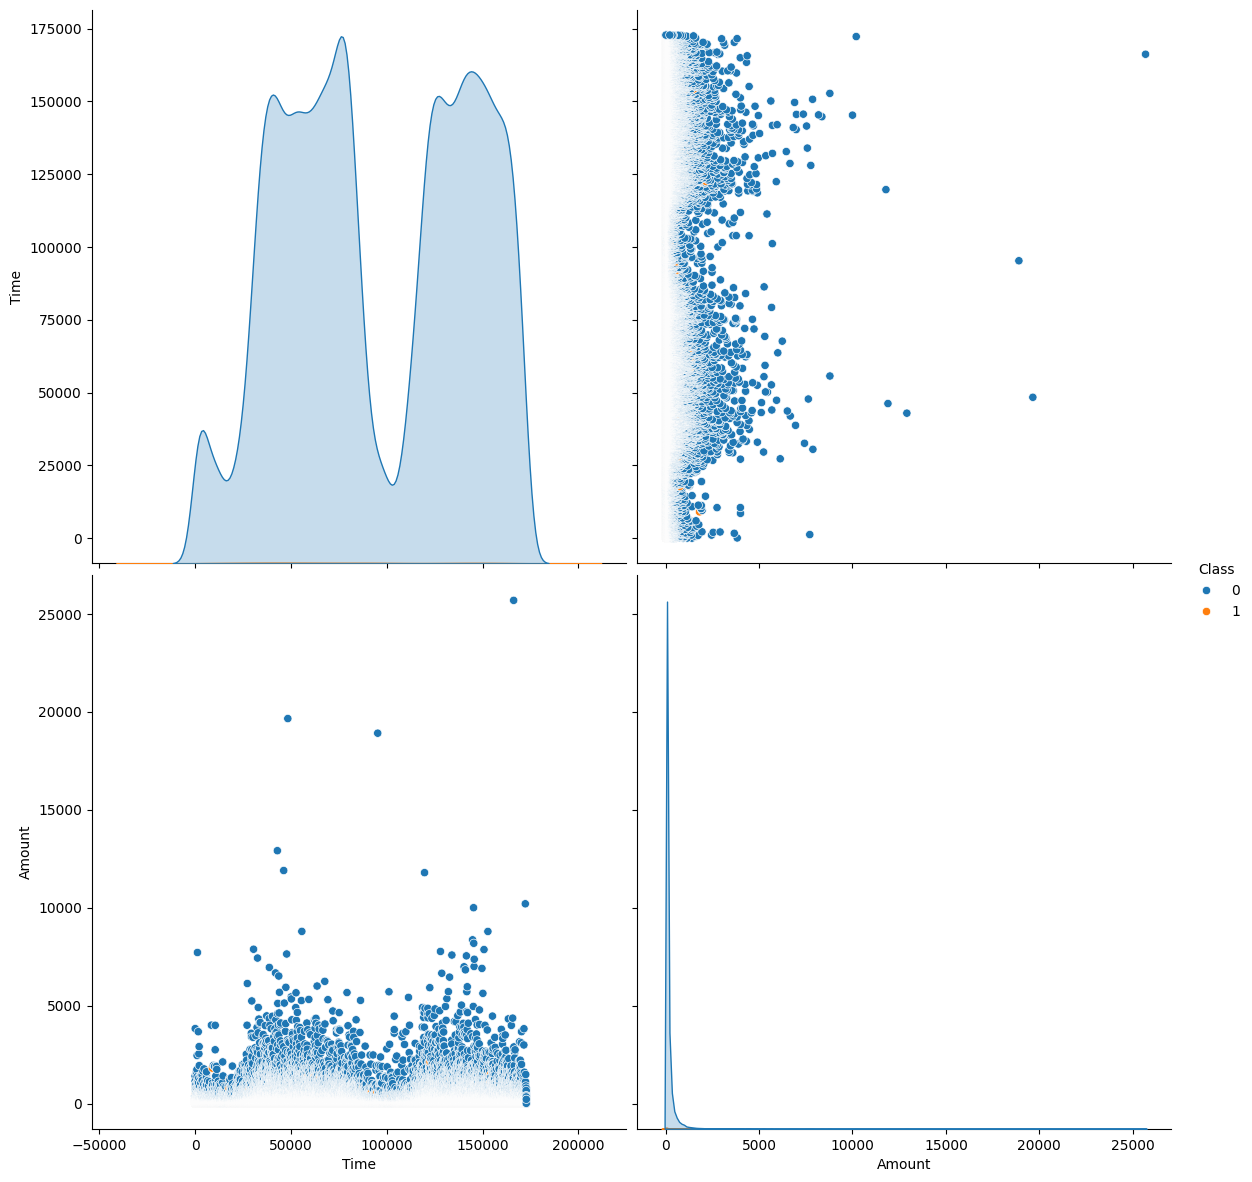

In [34]:
df_refine = df[["Time", "Amount", "Class"]]
sns.pairplot(df_refine, hue="Class", size=6)
plt.show()

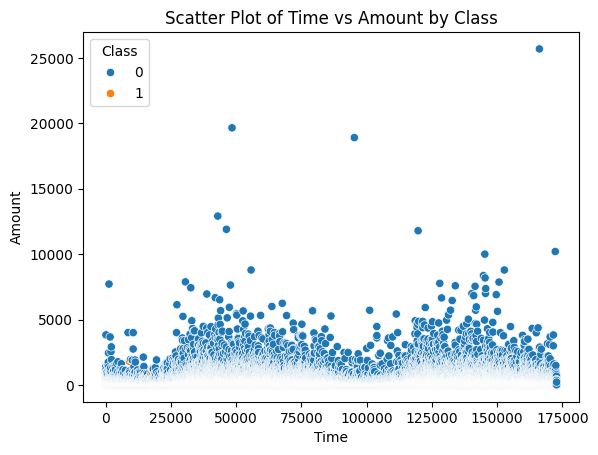

In [35]:
# Create the scatter plot with swapped axes
sns.scatterplot(x="Time", y="Amount", hue="Class", data=df)
# Add titles and labels
plt.title('Scatter Plot of Time vs Amount by Class')
plt.xlabel('Time')
plt.ylabel('Amount')
# Show the plot
plt.show()


C:\Users\Arunk\AppData\Local\Temp\ipykernel_13172\2049306790.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'], kde=True, bins=30, color='blue')  # Adjust bins and color as needed


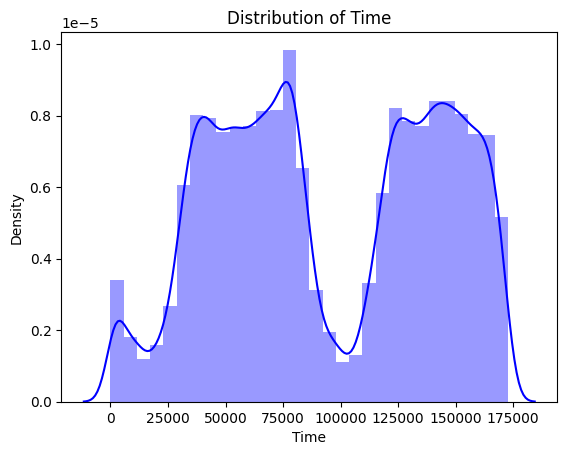

In [36]:
# Create a distplot for the 'Time' column
sns.distplot(df['Time'], kde=True, bins=30, color='blue')  # Adjust bins and color as needed

# Add titles and labels
plt.title('Distribution of Time')
plt.xlabel('Time')
plt.ylabel('Density')

# Show the plot
plt.show()


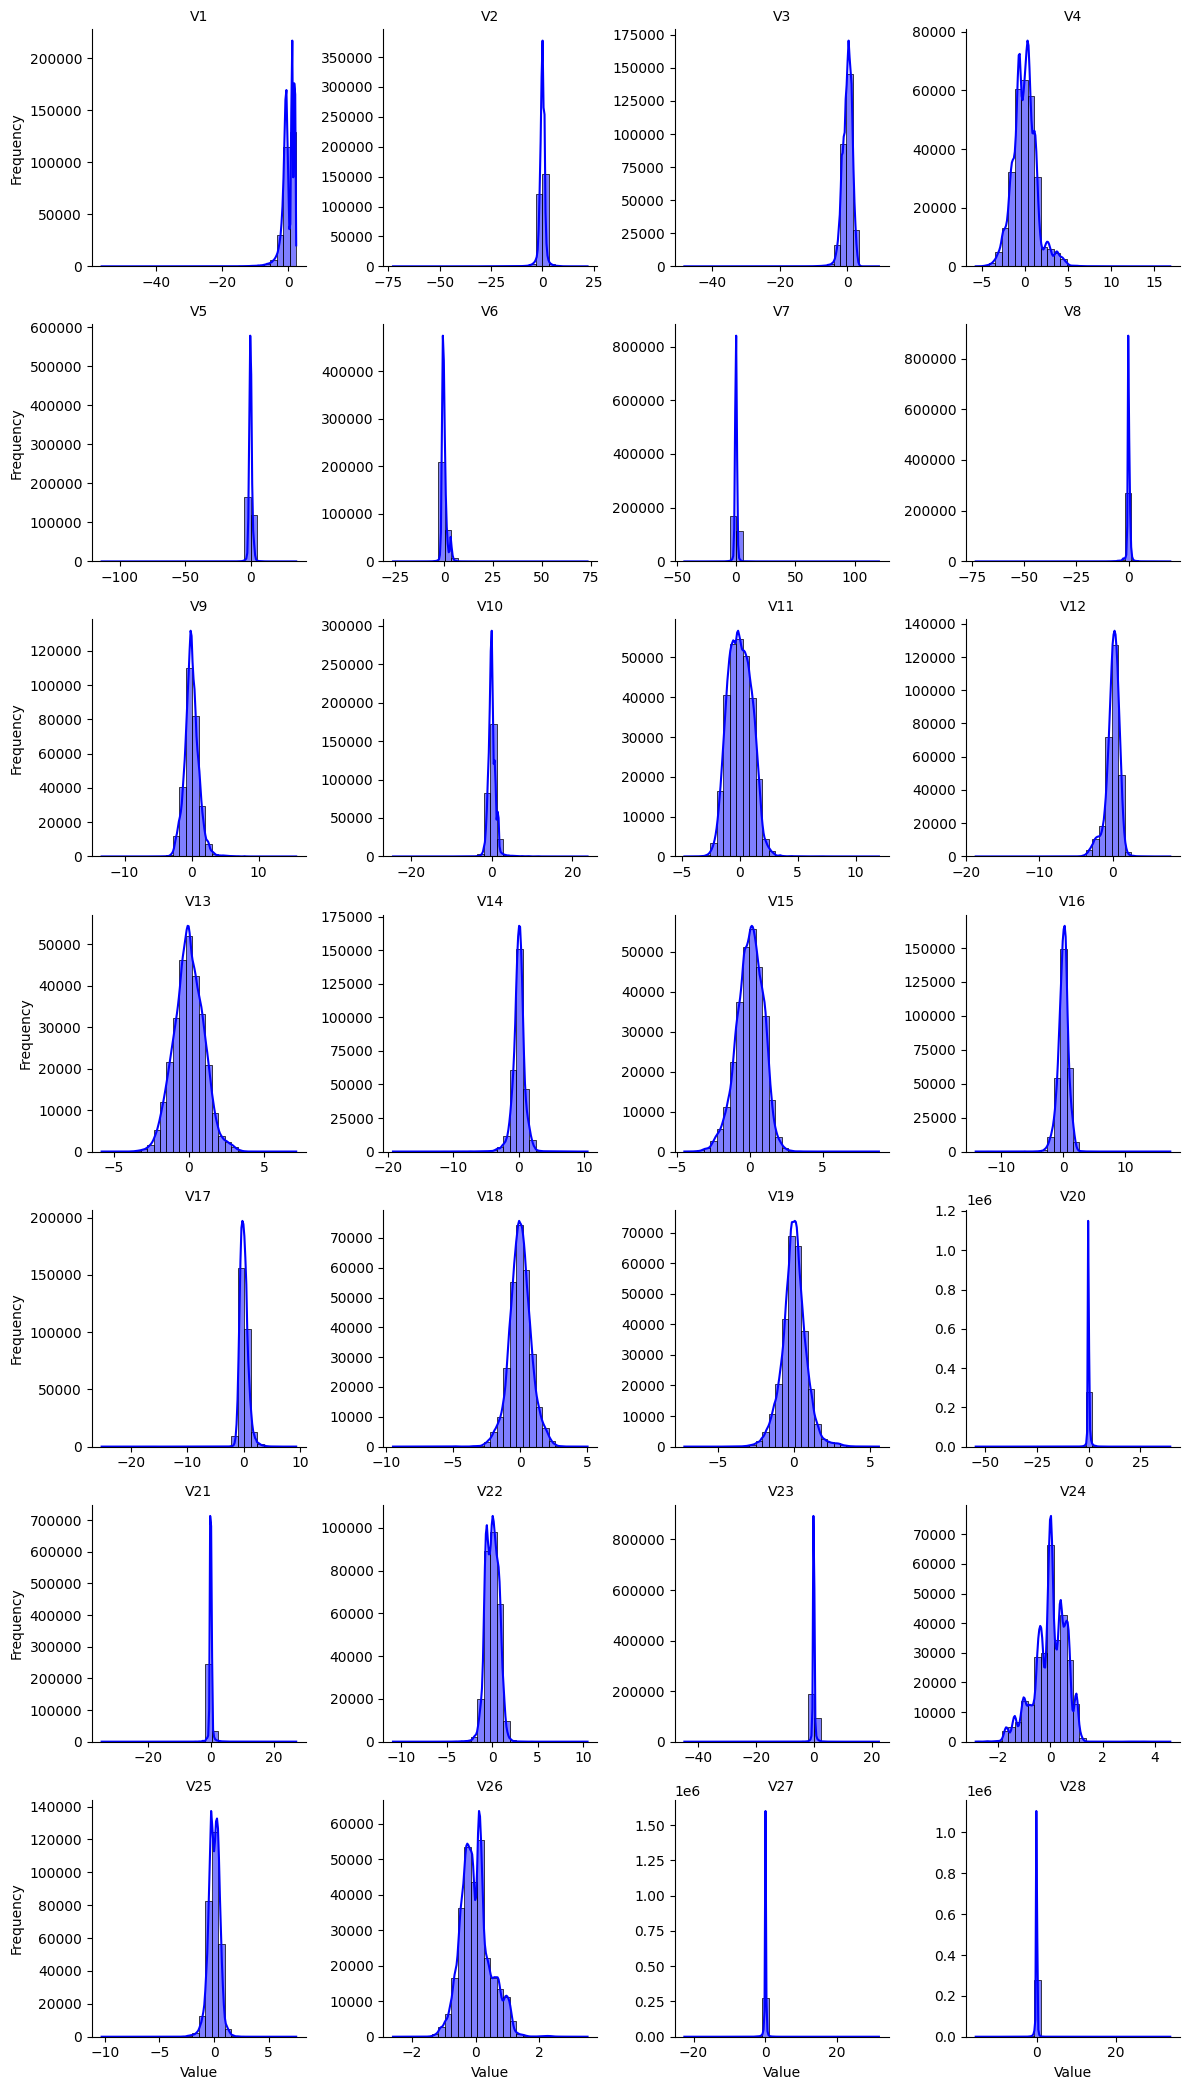

In [37]:
# List of columns to plot
columns_to_plot = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                    'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                    'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

# Create a FacetGrid to plot histograms for each column
g = sns.FacetGrid(df[columns_to_plot].melt(), col='variable', col_wrap=4, sharex=False, sharey=False)

# Map histplot to each subplot
g.map(sns.histplot, 'value', kde=True, bins=30, color='blue')

# Add titles and adjust layout
g.set_titles(col_template="{col_name}")
g.set_axis_labels('Value', 'Frequency')
g.set_titles("{col_name}")

# Show the plot
plt.tight_layout()
plt.show()


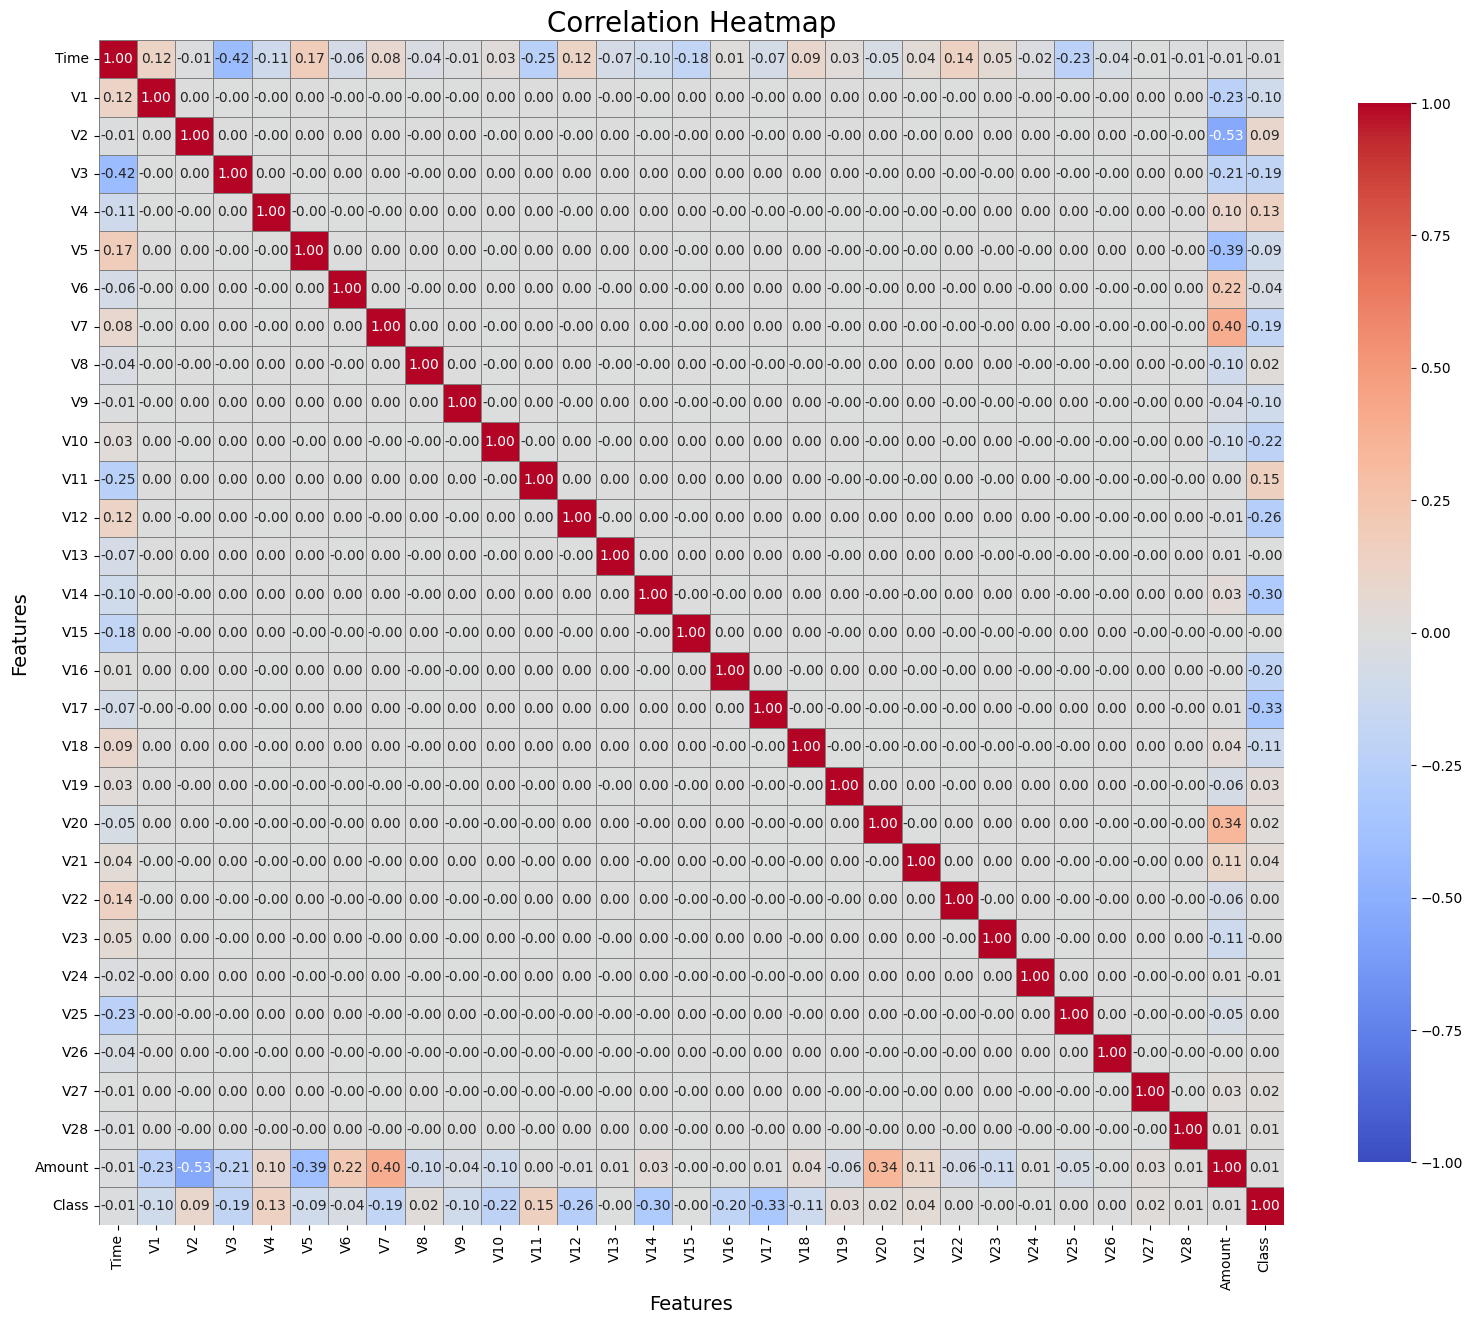

In [38]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(16, 14))  # Adjust the size of the plot for better readability
sns.heatmap(
    correlation_matrix,
    annot=True,            # Annotate each cell with the correlation coefficient
    cmap='coolwarm',       # Color map for the heatmap
    fmt=".2f",             # Format for the correlation coefficient text
    vmin=-1, vmax=1,       # Set the range of the color scale
    linewidths=0.5,        # Width of the lines that divide each cell
    linecolor='gray',      # Color of the lines that divide each cell
    square=True,           # Ensure the cells are square-shaped
    cbar_kws={'shrink': .8},  # Adjust color bar size
    annot_kws={"size": 10}  # Font size for annotations
)

# Add titles and labels
plt.title('Correlation Heatmap', fontsize=20)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()

Text(0.5, 1.0, 'Amount vs Class')

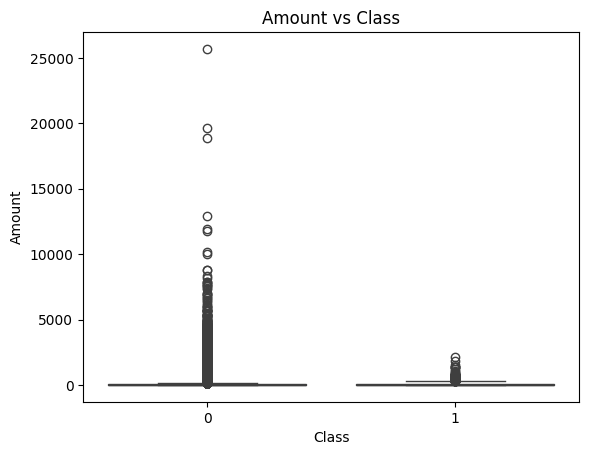

In [39]:
#class vs amount
sns.boxplot(x='Class',y='Amount',data=df)
plt.title('Amount vs Class')

Text(0.5, 1.0, 'Amounts by Minutes of Frauds and Normal Transactions')

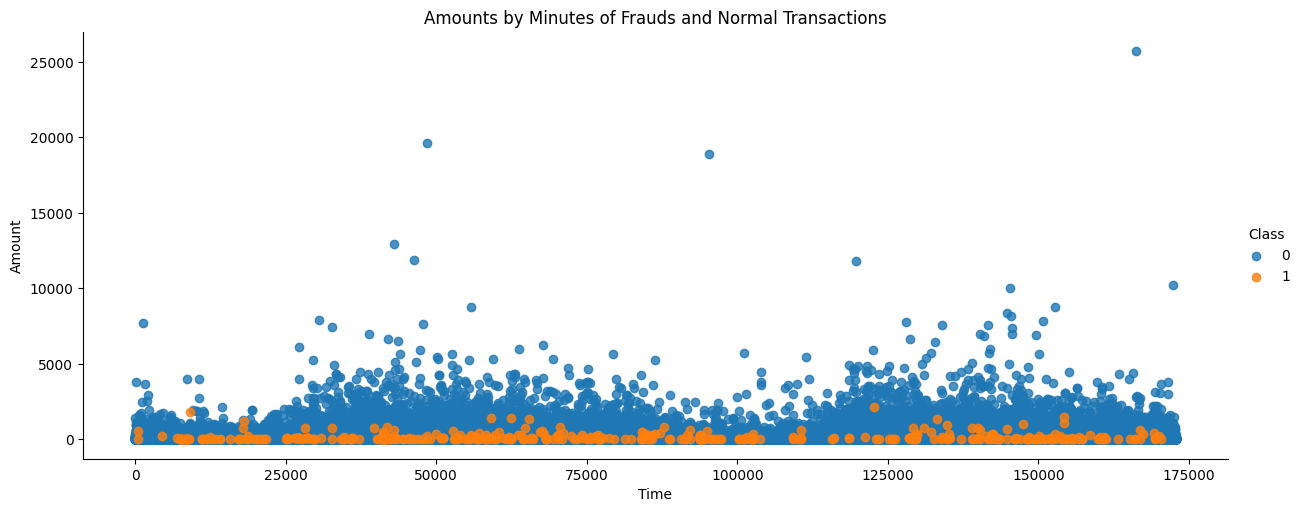

In [40]:
ax = sns.lmplot(y='Amount',x='Time',fit_reg=False,aspect=2.5,data=df,hue='Class')
plt.title("Amounts by Minutes of Frauds and Normal Transactions",fontsize=12)

Machine Learning Model

logistic regression

In [41]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pandas as pd

# Assuming 'Class' is the target column name (adjust if necessary)
x = df.iloc[:, :-1]  # Features (excluding the last column)
y = df['Class']  # Target column

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

# Initialize and train the logistic regression model
clf = linear_model.LogisticRegression(C=1.0, max_iter=1000)  # Replace 1.0 with an appropriate value for C
clf.fit(x_train, y_train)

# Predict on the test set
y_pred = clf.predict(x_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
# print("Confusion Matrix:")
print(conf_matrix)


[[99501    24]
 [   59    99]]


d:\new projects\guvi\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
print("\nAccuracy Score:")
print(accuracy)


Accuracy Score:
0.9991673605328892


In [43]:
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99525
           1       0.80      0.63      0.70       158

    accuracy                           1.00     99683
   macro avg       0.90      0.81      0.85     99683
weighted avg       1.00      1.00      1.00     99683



KNNeighbors Classifier

In [44]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pandas as pd

# Assuming 'Class' is the target column name (adjust if necessary)
x = df.iloc[:, :-1]  # Features (excluding the last column)
y = df['Class']  # Target column

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

# Initialize and train the KNN model
k = 5  # You can choose an appropriate value for k
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

# Predict on the test set
y_pred = knn.predict(x_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[99525     0]
 [  153     5]]


In [45]:
print("\nAccuracy Score:")
print(accuracy)


Accuracy Score:
0.9984651344762898


In [46]:
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99525
           1       1.00      0.03      0.06       158

    accuracy                           1.00     99683
   macro avg       1.00      0.52      0.53     99683
weighted avg       1.00      1.00      1.00     99683



SVM

In [47]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pandas as pd

# Assuming 'Class' is the target column name (adjust if necessary)
x = df.iloc[:, :-1]  # Features (excluding the last column)
y = df['Class']  # Target column

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

# Initialize and train the SVM model
svm = SVC(kernel='linear', C=1.0)  # You can choose different kernels like 'linear', 'poly', 'rbf', etc.
svm.fit(x_train, y_train)

# Predict on the test set
y_pred = svm.predict(x_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[99502    23]
 [   98    60]]


In [48]:
print("\nAccuracy Score:")
print(accuracy)


Accuracy Score:
0.9987861521021638


In [49]:
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99525
           1       0.72      0.38      0.50       158

    accuracy                           1.00     99683
   macro avg       0.86      0.69      0.75     99683
weighted avg       1.00      1.00      1.00     99683



In [50]:
# Save logisticregression model as logisticregression.pkl
with open('logisticregression.pkl', 'wb') as model_file:
    pickle.dump(clf, model_file)

# Save kn_neigthbour.pkl model as kn_neigthbour.pkl
with open('kn_neigthbour.pkl', 'wb') as model_file:
    pickle.dump(knn, model_file)

# Save Support Vector Classifier model as supportvector.pkl
with open('supportvector.pkl', 'wb') as model_file:
    pickle.dump(svm, model_file)

# Summary to the business
For banks with smaller average transaction value, we would want high precision because we only want to label relevant transactions as fraudulent. For every transaction that is flagged as fraudulent, we can add the human element to verify whether the transaction was done by calling the customer. However, when precision is low, such tasks are a burden because the human element has to be increased.

For banks having a larger transaction value, if the recall is low, i.e., it is unable to detect transactions that are labelled as non-fraudulent. So we have to consider the losses if the missed transaction was a high-value fraudulent one.